In [1]:
import torch
from torch import nn
from torch import optim
from torchvision import transforms, datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import os
from torchvision.io import read_image
from torch.utils.data import Dataset
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
import warnings
warnings.filterwarnings('ignore')

In [2]:
import models
import data_preprocess
import train_test

In [3]:
# Define image dimensions
image_size = 224
image_crop = 224
num_batches = 10
# Define data directory
data_dir1 = r'D:\Fall-2023\Machine_Learning_With_Bioinformatics\DataSets\apple_grey'
data_dir2 = r'D:\Fall-2023\Machine_Learning_With_Bioinformatics\DataSets\grape_grey'

In [4]:
device_gpu = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [5]:
def classification_model_plot(data_loader, model, class_names):

    # Plotting the classification results of the model.


    # Evaluation mode of the model
    model.eval()

    # Creating lists to store original labels and predicted labels
    original_labels = []
    predicted_labels = []

# Iterating over the images present in input data
    with torch.no_grad():
        for img, lab in data_loader:
            img, lab = img.to(device_gpu), lab.to(device_gpu)
            # Forward pass through the model
            output = model(img).to(device_gpu)

            # Converting the output value to class predictions
            x, predicted = torch.max(output, 1)

            # Append the true and predicted labels to the lists
            original_labels.extend(lab.cpu().numpy())
            predicted_labels.extend(predicted.cpu().numpy())

    # Generating confusion matrix for the given model
    conf_matrix = confusion_matrix(original_labels, predicted_labels)

    # Normalising the confusion matrix
    conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    # Generating classification report for the model
    class_report = classification_report(original_labels, predicted_labels, target_names=class_names)

    # Plotting the confusion matrix of the model
    fig, axis = plt.subplots(figsize=(10, 10))
    img = axis.imshow(conf_matrix_norm, interpolation='nearest', cmap=plt.cm.Oranges)
    axis.figure.colorbar(img, ax=axis)
    axis.set(xticks=np.arange(conf_matrix.shape[1]),
           yticks=np.arange(conf_matrix.shape[0]),
           xticklabels=class_names, yticklabels=class_names,
           xlabel='Predicted label',
           ylabel='True label',
           title='Confusion matrix')
    plt.setp(axis.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Creating text annotations over the data using loop.
    fmt = '.2f'
    thresh = conf_matrix_norm.max() / 2.
    for i in range(conf_matrix_norm.shape[0]):
        for j in range(conf_matrix_norm.shape[1]):
            text_color = "white" if conf_matrix_norm[i, j] > thresh else "black"
            axis.text(j, i, format(conf_matrix_norm[i, j], fmt),
                    ha="center", va="center",
                    color=text_color, fontsize=12, fontweight='bold')
    fig.tight_layout()
    
    # Calculating overall precision, recall, F1-score, support values
    overall_metrics = precision_recall_fscore_support(original_labels, predicted_labels, average='weighted')

    # Extracting overall metrics
    overall_precision, overall_recall, overall_f1score, overall_support = overall_metrics


    # Displaying overall metrics
    print(f"Precision: {overall_precision:.4f}")
    print(f"Recall: {overall_recall:.4f}")
    print(f"F1-score: {overall_f1score:.4f}")
    print(f"Support: {overall_support}")
    
    
    # Printing the classification report
    print(class_report)

In [6]:
img_dataset, train_loader, test_loader, validation_loader=data_preprocess.data(data_dir1,num_batches,image_size,device_gpu)

Total images is  3171
Total number of training images is  1890
Total number of test images is  480
Total number of validation images is  810


In [7]:
model1=models.vgg(img_dataset, train_loader, device_gpu)

Training the model


  0%|          | 0/189 [00:00<?, ?it/s]

Epoch accuracy:  0.8058201058201067
Training the model


  0%|          | 0/189 [00:00<?, ?it/s]

Epoch accuracy:  0.9403880070546748
Training the model


  0%|          | 0/189 [00:00<?, ?it/s]

Epoch accuracy:  0.9613756613756621
Training the model


  0%|          | 0/189 [00:00<?, ?it/s]

Epoch accuracy:  0.9597883597883603
Training the model


  0%|          | 0/189 [00:00<?, ?it/s]

Epoch accuracy:  0.9693121693121699
Training accuracy of the model is  0.9693121693121699
Completed


In [8]:
train_test.model_evaluate(validation_loader, model1, device_gpu)

validation accuracy of the model is : 0.9555


In [9]:
label_Names = os.listdir(data_dir1)
classes = img_dataset.class_to_idx

Precision: 0.9611
Recall: 0.9592
F1-score: 0.9594
Support: None
                          precision    recall  f1-score   support

      Apple___Apple_scab       0.97      0.90      0.93       165
       Apple___Black_rot       0.93      0.97      0.95       157
Apple___Cedar_apple_rust       0.87      1.00      0.93        73
         Apple___healthy       0.99      0.97      0.98       414

                accuracy                           0.96       809
               macro avg       0.94      0.96      0.95       809
            weighted avg       0.96      0.96      0.96       809



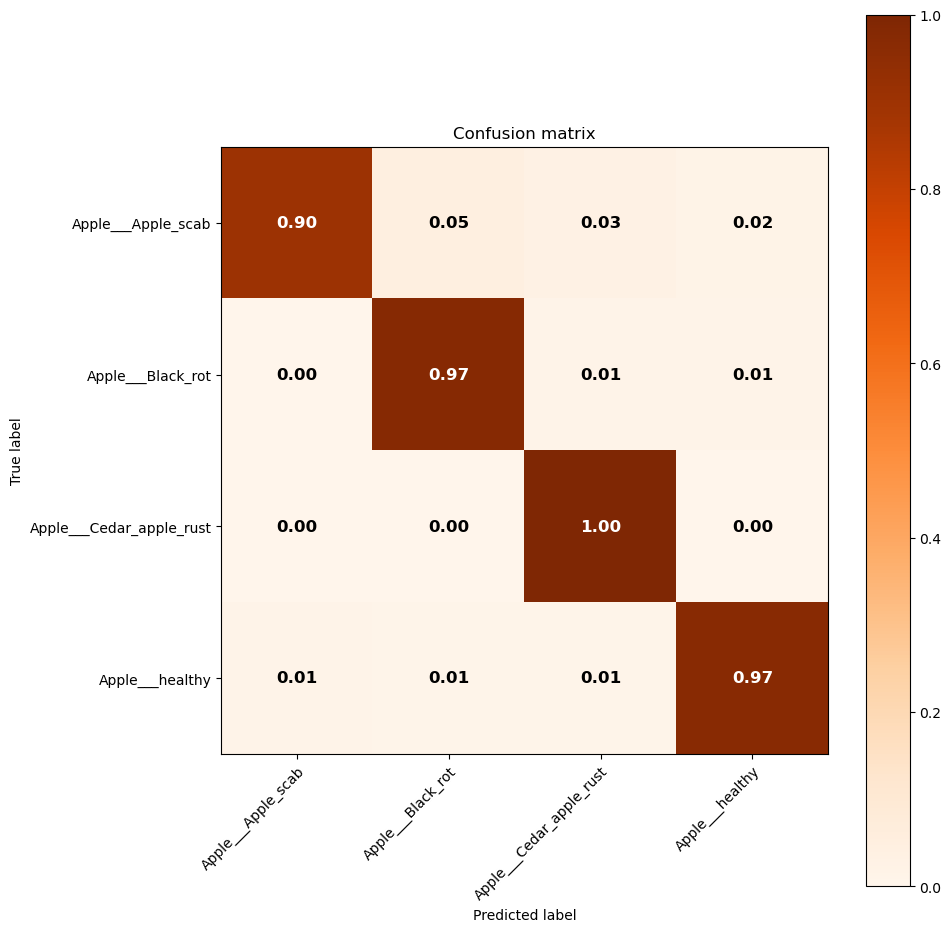

In [10]:
classification_model_plot(validation_loader, model1, classes.keys())

In [7]:
model2=models.vgg(img_dataset, train_loader, device_gpu)

Training the model


  0%|          | 0/189 [00:00<?, ?it/s]

Epoch accuracy:  0.8222222222222229
Training the model


  0%|          | 0/189 [00:00<?, ?it/s]

Epoch accuracy:  0.9492063492063499
Training the model


  0%|          | 0/189 [00:00<?, ?it/s]

Epoch accuracy:  0.9571428571428581
Training the model


  0%|          | 0/189 [00:00<?, ?it/s]

Epoch accuracy:  0.9631393298059973
Training the model


  0%|          | 0/189 [00:00<?, ?it/s]

Epoch accuracy:  0.9698412698412704
Training accuracy of the model is  0.9698412698412704
Completed


In [8]:
train_test.model_evaluate(validation_loader, model2, device_gpu)

validation accuracy of the model is : 0.9320


In [9]:
label_Names = os.listdir(data_dir1)
classes = img_dataset.class_to_idx

Precision: 0.9369
Recall: 0.9308
F1-score: 0.9293
Support: None
                          precision    recall  f1-score   support

      Apple___Apple_scab       1.00      0.78      0.88       181
       Apple___Black_rot       0.98      0.93      0.96       149
Apple___Cedar_apple_rust       0.95      0.92      0.94        63
         Apple___healthy       0.89      1.00      0.94       416

                accuracy                           0.93       809
               macro avg       0.96      0.91      0.93       809
            weighted avg       0.94      0.93      0.93       809



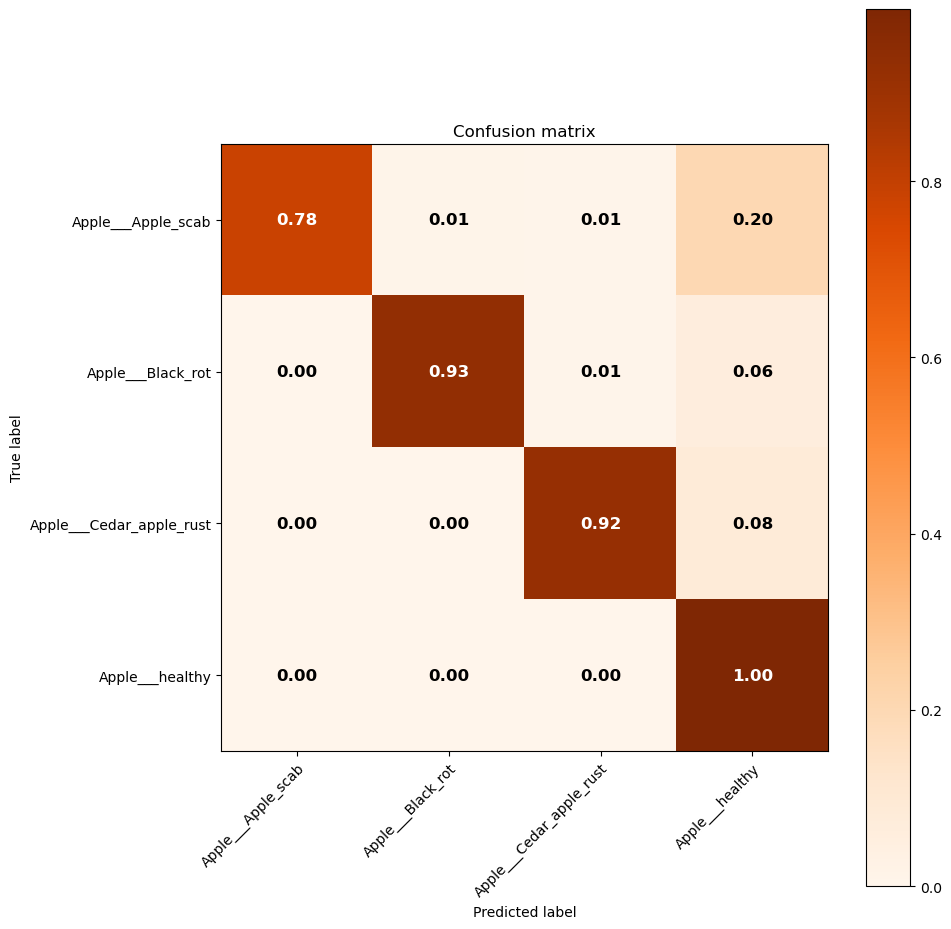

In [10]:
classification_model_plot(validation_loader, model2, classes.keys())